# Desafio - Individual: Criação de um Data Storytelling com Streamlit

Fonte: [Base de Dados](https://drive.google.com/file/d/17wzzevHbAYy4alH3fo5N_yC9JmNG7vmy/view?usp=drive_link)



## Preparando ambiente de desenvolvimento

Importando as bibliotecas necessárias

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

carregando dataframe com a base de dados

In [2]:
df_employee_perf = pd.read_csv("/content/employee_performance.csv")

## Exploração da base de dados

### Observando as estatísticas descritivas da base de dados

In [4]:
df_employee_perf.shape

(180, 6)

In [3]:
df_employee_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        180 non-null    int64  
 1   Department         180 non-null    object 
 2   Performance_Score  180 non-null    int64  
 3   Training_Hours     180 non-null    float64
 4   Salary             180 non-null    float64
 5   Date_of_Joining    180 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 8.6+ KB


In [5]:
df_employee_perf.head(5)

,Employee_ID,Department,Performance_Score,Training_Hours,Salary,Date_of_Joining
0,101,HR,9,0.0,30000.00,2015-12-31
1,102,HR,4,0.5,30642.20,2016-12-31
2,103,Sales,8,0.9,31284.40,2017-12-31
3,104,Sales,5,1.4,31926.61,2018-12-31
4,105,IT,6,1.8,32568.81,2019-12-31


In [6]:
df_employee_perf.tail(5)

,Employee_ID,Department,Performance_Score,Training_Hours,Salary,Date_of_Joining
175,166,IT,9,29.8,71743.12,2080-12-31
176,167,IT,6,30.3,72385.32,2081-12-31
177,168,HR,8,30.7,73027.52,2082-12-31
178,169,HR,4,31.2,73669.72,2083-12-31
179,170,Sales,7,31.7,74311.93,2084-12-31


In [8]:
df_employee_perf.sample(5)

,Employee_ID,Department,Performance_Score,Training_Hours,Salary,Date_of_Joining
68,169,HR,4,31.2,73669.72,2083-12-31
127,118,HR,5,7.8,40917.43,2032-12-31
32,133,Marketing,9,14.7,50550.46,2047-12-31
111,102,HR,4,0.5,30642.20,2016-12-31
92,193,Sales,5,42.2,89082.57,2107-12-31


In [13]:
df_employee_perf.describe()

,Employee_ID,Performance_Score,Training_Hours,Salary
count,180.000000,180.000000,180.000000,180.000000
mean,147.722222,6.600000,21.432778,60005.096833
std,29.577671,1.663274,13.566138,18994.834500
min,101.000000,4.000000,0.000000,30000.000000
25%,123.000000,5.000000,10.100000,44128.440000
50%,145.500000,6.000000,20.400000,58577.980000
75%,168.000000,8.000000,30.700000,73027.520000
max,210.000000,9.000000,50.000000,100000.000000


## Executando queries

Roteiro:

- Qual é o departamento com a melhor média de performance?
- Qual é o departamento com a maior média de horas treinamento?
- Qual é o departamento com a melhor média de salários?
- Qual é o departamento com mais funcionários?

### Quais são os departamento (`Department`) com a maior média de performance (`Performance_Score`)?

In [19]:
df_plot_perf_avg = df_employee_perf.groupby("Department")["Performance_Score"].mean().sort_values(ascending=False)

In [21]:
df_plot_perf_avg

,Performance_Score
Department,
Marketing,7.147059
Sales,6.693878
IT,6.431373
HR,6.282609


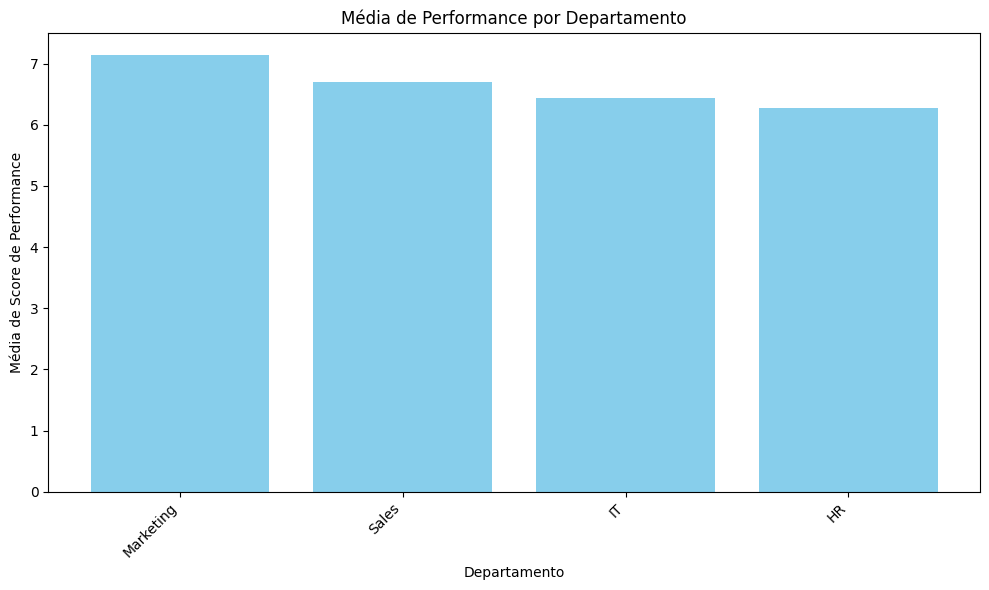

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(df_plot_perf_avg.index, df_plot_perf_avg.values, color='skyblue')

# Adicionar título e rótulos
plt.title("Média de Performance por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Média de Score de Performance")

# Rotacionar os rótulos do eixo x para melhor leitura
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Quais são os departamentos (`Departament`) com a maior média de horas de treinos dos seus funcionários (`Training_Hours`)?

In [45]:
df_plot_train_avg = df_employee_perf.groupby("Department")["Training_Hours"].mean().sort_values(ascending=False)



In [46]:
df_plot_train_avg

,Training_Hours
Department,
Sales,23.397959
Marketing,22.941176
IT,20.870588
HR,18.847826


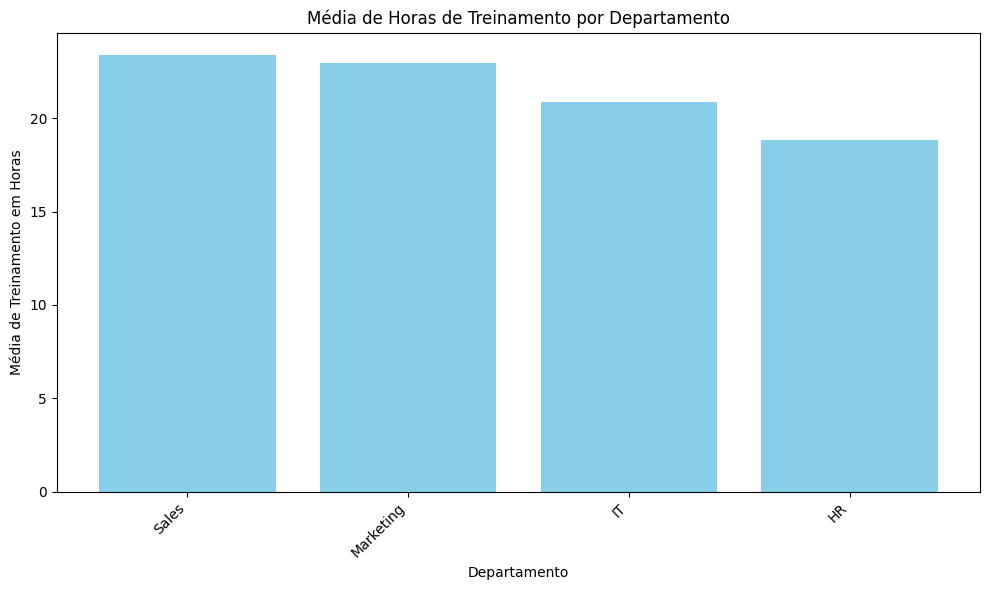

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(df_plot_train_avg.index, df_plot_train_avg.values, color='skyblue')

# Adicionar título e rótulos
plt.title("Média de Horas de Treinamento por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Média de Treinamento em Horas")

# Rotacionar os rótulos do eixo x para melhor leitura
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Qual é o departamento com a melhor média de salários?

In [50]:
df_plot_slry_avg = df_employee_perf.groupby("Department")["Salary"].mean().sort_values(ascending=False)


In [51]:
df_plot_slry_avg

,Salary
Department,
Sales,62752.293878
Marketing,62128.980000
IT,59213.887255
HR,56386.118696


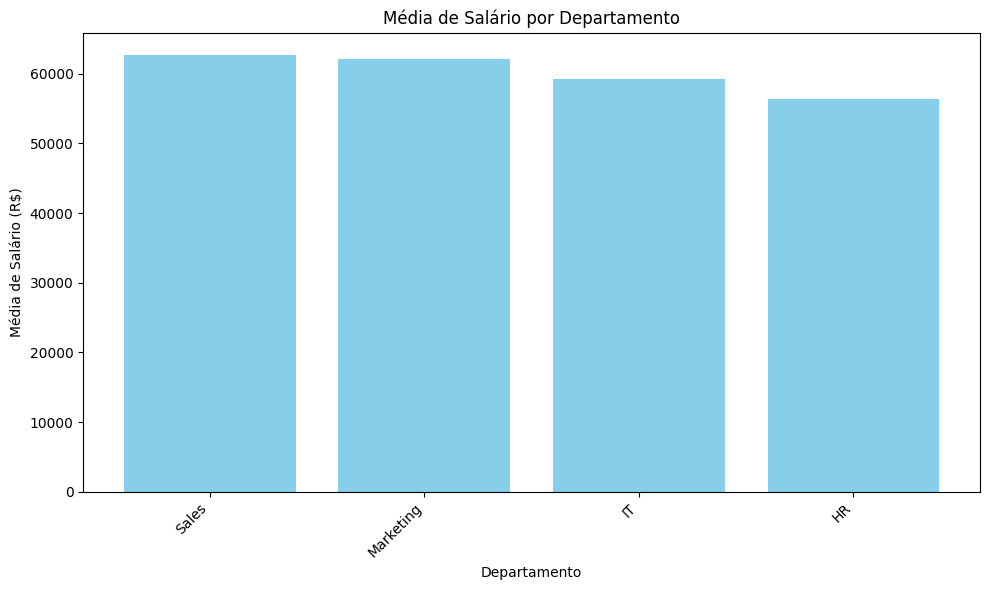

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(df_plot_slry_avg.index, df_plot_slry_avg.values, color='skyblue')

# Adicionar título e rótulos
plt.title("Média de Salário por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Média de Salário (R$)")

# Rotacionar os rótulos do eixo x para melhor leitura
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Qual é o departamento com mais funcionários?

In [54]:
df_plot_employee = df_employee_perf.groupby("Department")["Employee_ID"].nunique().sort_values(ascending=False)


In [55]:
df_plot_employee

,Employee_ID
Department,
Sales,32
IT,31
HR,26
Marketing,21


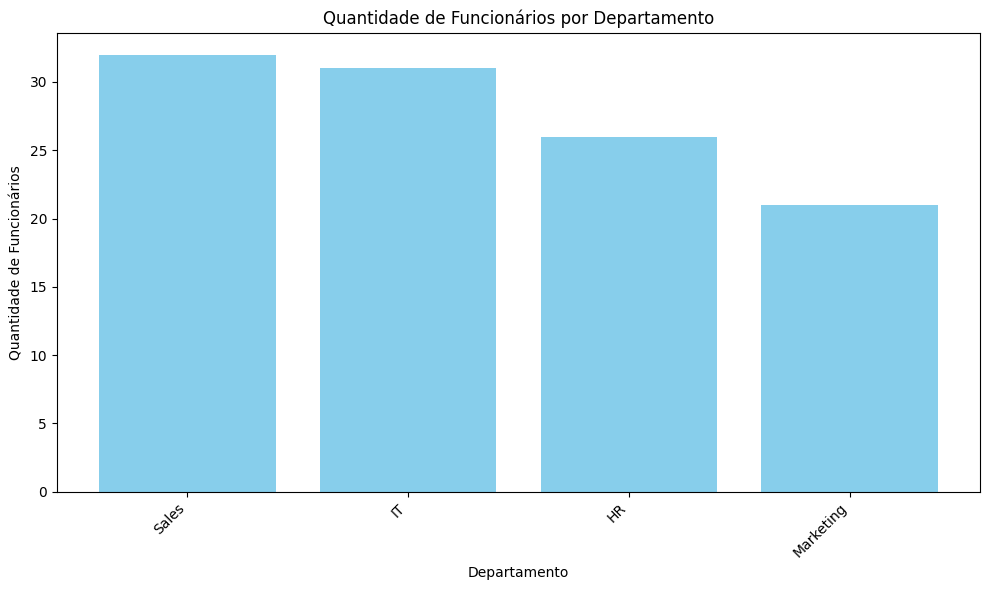

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(df_plot_employee.index, df_plot_employee.values, color='skyblue')

# Adicionar título e rótulos
plt.title("Quantidade de Funcionários por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Quantidade de Funcionários")

# Rotacionar os rótulos do eixo x para melhor leitura
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.tight_layout()
plt.show()